In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install autoNLP
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 264 kB 26.2 MB/s 
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |████████████████████████████████| 69 kB 9.5 MB/s 
     |████████████████████████████████| 61 kB 9.6 MB/s 
     |████████████████████████████████| 115 kB 62.6 MB/s 
     |████████████████████████████████| 212 kB 72.9 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.5.0
    Uninstalling prettytable-3.5.0:
      Successfully uninstalled prettytable-3.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-

In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 14.7 MB/s 


In [5]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 16.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-ensemble 0.1.7 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [6]:
import neattext as nt
import pandas as pd
import numpy as np
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Embedding, Dropout, Flatten, Layer, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv(r"/content/drive/MyDrive/mini_pro/data/sc.csv.xls")

In [9]:
df.head()

,content,score,at
0,Snapscore is not updating properly and other b...,1,2022-09-13 18:43:11
1,Not getting notifications even though notifica...,1,2022-09-13 18:39:43
2,It's super fun app...!!! Can you please upload...,5,2022-09-13 18:30:50
3,- Not consumer friendly. Ads and unskippable a...,1,2022-09-13 18:23:26
4,I only want notifications for messages from fr...,1,2022-09-13 18:08:44


In [10]:
df.columns

Index(['content', 'score', 'at'], dtype='object')

In [11]:
df=df[["content","score"]]

In [12]:
df.iloc[20]["content"]

'extreme 😎😎😎😎😎 love it yar its amazing l have no words to describe it 😄😄😄its fantastic'

- converting the data into lower case 

In [13]:
# Lowering the text
df['content']= df['content'].apply(lambda x: x.lower())

In [14]:
df.iloc[20]["content"]

'extreme 😎😎😎😎😎 love it yar its amazing l have no words to describe it 😄😄😄its fantastic'

**task**
- Removal Punctuation 
- remove html tags
- Remove special character 
- remove userhandels / mentions
- remove hastags
- remove stopwords


In [15]:
# method/attributes
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [16]:
# methos /attributes  of nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [17]:
df.iloc[20]["content"]

'extreme 😎😎😎😎😎 love it yar its amazing l have no words to describe it 😄😄😄its fantastic'

## function approch

In [18]:
df.head()


,content,score
0,snapscore is not updating properly and other b...,1
1,not getting notifications even though notifica...,1
2,it's super fun app...!!! can you please upload...,5
3,- not consumer friendly. ads and unskippable a...,1
4,i only want notifications for messages from fr...,1


In [19]:
df['Clean_Text']=df.content.apply(nfx.remove_userhandles)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_stopwords)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_hashtags)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_special_characters)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emojis)

In [20]:
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_phone_numbers)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currencies)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_dates)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_urls)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emails)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_currency_symbols)
df['Clean_Text']=df.Clean_Text.apply(nfx.fix_contractions)

In [21]:
df.iloc[65]["content"]

"why i can't use some lenses with magic wand icon?, people on the internet using lenses just fine recording and applying lenses, but for me only can use it on photo and can't apply on my video when recording"

In [22]:
df.iloc[65]["Clean_Text"]

'cant use lenses magic wand icon people internet lenses fine recording applying lenses use photo cant apply video recording'

In [23]:
df.head()

,content,score,Clean_Text
0,snapscore is not updating properly and other b...,1,snapscore updating properly bug found
1,not getting notifications even though notifica...,1,getting notifications notifications
2,it's super fun app...!!! can you please upload...,5,super fun app upload saree outfit snapchat
3,- not consumer friendly. ads and unskippable a...,1,consumer friendly ads unskippable ads stories...
4,i only want notifications for messages from fr...,1,want notifications messages friends giving ad ...


In [24]:
# Preview some of the pairs of questions
a = 0 
for i in range(a,a+10):
    print(df.Clean_Text[i])
    print()

snapscore updating properly bug found 

getting notifications notifications

super fun app upload saree outfit snapchat

 consumer friendly ads unskippable ads stories discover  toxic discover page clickbait  pay unlock features  constantly wants add random ppl world  wants add contacts phone way often  cant customize friends list shows friends alphabetically chore select recipients  upload story change audience change audience previously uploaded story snap

want notifications messages friends giving ad notifications category ruins app

cant exact time filters solve soon possible

9 13 22 camera keeps freezing try pic filter wont work literally worst update app

installed 2 time camera working bugs updated improve

camera app work anymore shows black screen cant photo anything know fix

app working update



In [25]:
import seaborn as sns

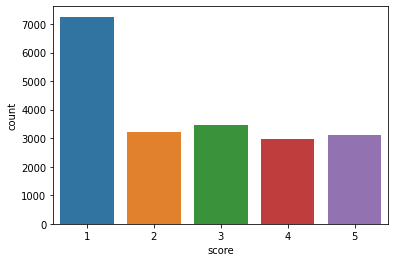

In [26]:
sns.countplot(x = 'score', data = df)

In [27]:
df.describe() #descriptive statistics

,score
count,20000.000000
mean,2.574500
std,1.483732
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


## droping duplicate

In [28]:
df.duplicated().sum()

5

In [29]:
df.shape

(20000, 3)

In [30]:
df=df.drop_duplicates()

In [31]:
df.shape

(19995, 3)

##visualization

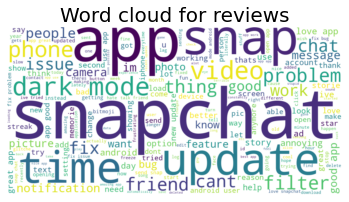

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

allwords = ' '.join([rev for rev in df['Clean_Text']])
wordcloud = WordCloud(width = 1200, height = 600, random_state = 23, background_color="white").generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for reviews',fontsize = 20)
plt.show()

In [33]:
from textblob import TextBlob
df['polarity'] = df.content.apply(lambda x: TextBlob(x).polarity)
df['subjectivity'] = df.content.apply(lambda x: TextBlob(x).subjectivity)

df.head()

,content,score,Clean_Text,polarity,subjectivity
0,snapscore is not updating properly and other b...,1,snapscore updating properly bug found,-0.062500,0.237500
1,not getting notifications even though notifica...,1,getting notifications notifications,0.000000,0.000000
2,it's super fun app...!!! can you please upload...,5,super fun app upload saree outfit snapchat,0.459635,0.433333
3,- not consumer friendly. ads and unskippable a...,1,consumer friendly ads unskippable ads stories...,0.065476,0.416667
4,i only want notifications for messages from fr...,1,want notifications messages friends giving ad ...,-0.050000,0.441667


In [34]:
df['sentiment'] = np.where(df.polarity > 0, 'positive', np.where(df.polarity < 0, 'negative', 'neutral'))
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other b...,1,snapscore updating properly bug found,-0.062500,0.237500,0
1,not getting notifications even though notifica...,1,getting notifications notifications,0.000000,0.000000,0
2,it's super fun app...!!! can you please upload...,5,super fun app upload saree outfit snapchat,0.459635,0.433333,1
3,- not consumer friendly. ads and unskippable a...,1,consumer friendly ads unskippable ads stories...,0.065476,0.416667,1
4,i only want notifications for messages from fr...,1,want notifications messages friends giving ad ...,-0.050000,0.441667,0


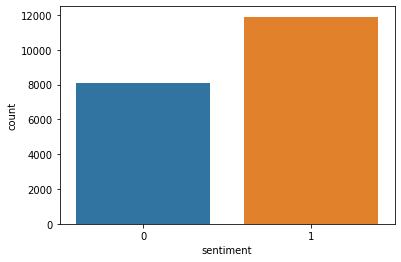

In [35]:
sns.countplot(x = 'sentiment', data = df)

In [36]:
# Shows the top 5 tweets with highest polarity scores
df.nlargest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
19,the app is the best but when i send massage to...,app best send massage person message sent fix ...
149,awesome app to take best snaps ever .....luv s...,awesome app best snaps luv snapchat
237,hey i love the app u may be wondering why i ga...,hey love app u wondering gave 1 star because w...
265,this is very best application but now it's not...,best application works update working tell do
272,this is awesome i like it but some problems......,awesome like problems
296,it's wonderful to take pictures and do streaks✨,wonderful pictures streaks
345,it the best app for talking with friends,best app talking friends
380,app is extremely excellent 👍👍👌👌 but one proble...,app extremely excellent problem app change us...
405,this is the world best app becuse i can see lo...,world best app becuse location brother 100007 ...
456,this is the best app for selfies and chanting ...,best app selfies chanting friends


In [37]:
# Shows the top 5 tweets with lowest polarity scores
df.nsmallest(10,'polarity')[['content','Clean_Text']]

,content,Clean_Text
6,"9. 13. 22- the camera keeps freezing, if you t...",9 13 22 camera keeps freezing try pic filter w...
391,pictures look terrible on z fold 4. no optimiz...,pictures look terrible z fold 4 optimization w...
495,it horrible it to me laggy and it doesn't let ...,horrible laggy let messages
520,worst customer support. lot of bugs in the app...,worst customer support lot bugs application ca...
644,it don't work at all! they need to fix it now ...,work all need fix cant account fix promblem ra...
728,this app is the worst i have to update it ever...,app worst update evertime want use
737,snapchat widget not working also terrible came...,snapchat widget working terrible camera perfor...
1115,i'm not getting notifications.its horrible oth...,im getting notificationsits horrible okayjust ...
1180,"horrible photos now, everything is blurry no m...",horrible photos now blurry matter now s21ultra
1332,"it won""t let me sign up fix the error please i...",wont let sign fix error annoying


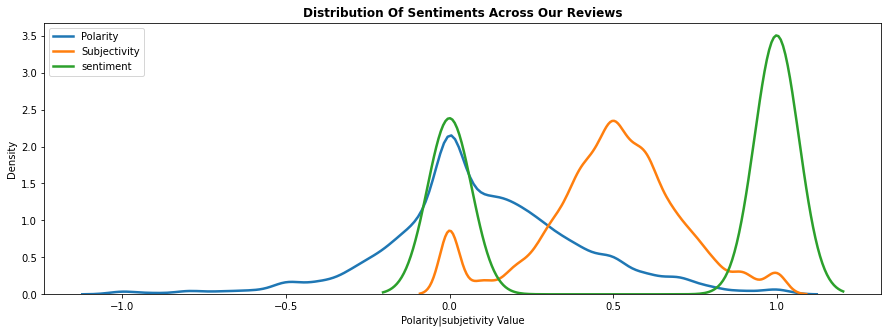

In [38]:
plt.figure(figsize=(15,5))
plt.title('Distribution Of Sentiments Across Our Reviews',fontsize=12,fontweight='bold')
sns.kdeplot(df['polarity'], label='Polarity', lw=2.5)
sns.kdeplot(df['subjectivity'], label='Subjectivity', lw=2.5)
sns.kdeplot(df['sentiment'], label='sentiment', lw=2.5)

plt.xlabel('Polarity|subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()

In [39]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(df['sentiment'].value_counts()[1])),'i.e.',round(df['sentiment'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Positive reviews are 8095 i.e. 40.49 % of the dataset
Negative reviews are 11900 i.e. 59.51 % of the dataset


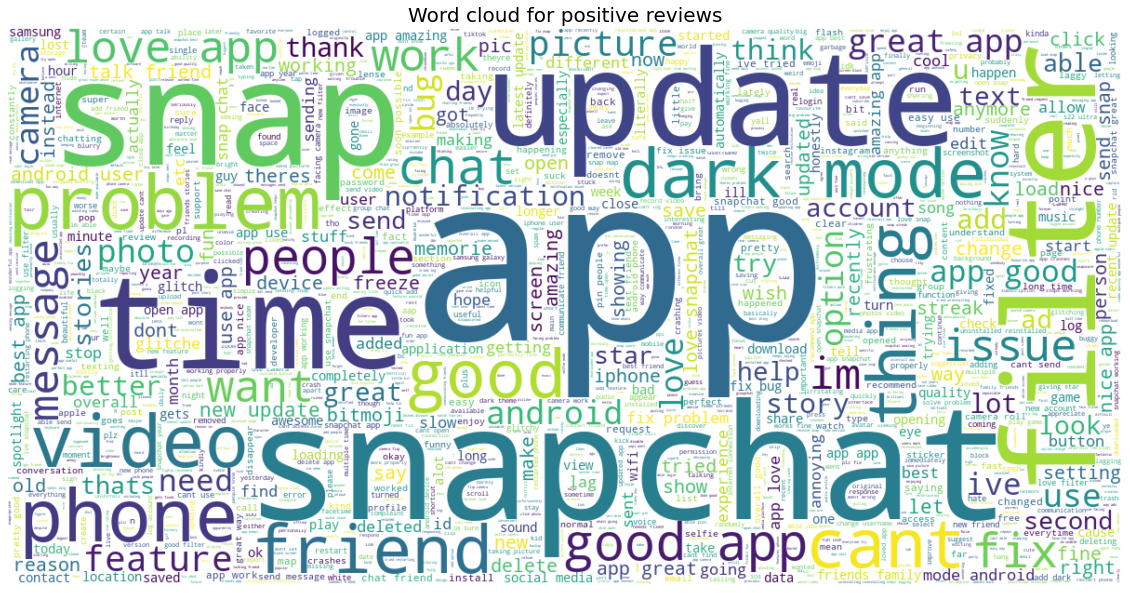

In [40]:
from wordcloud import WordCloud
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['Clean_Text']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

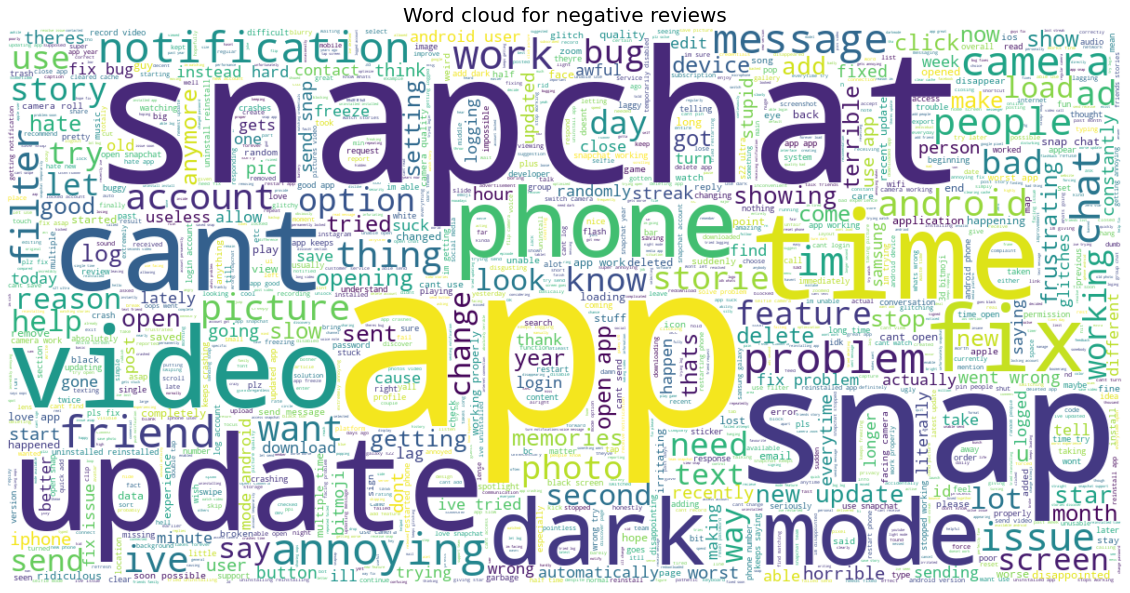

In [41]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['Clean_Text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

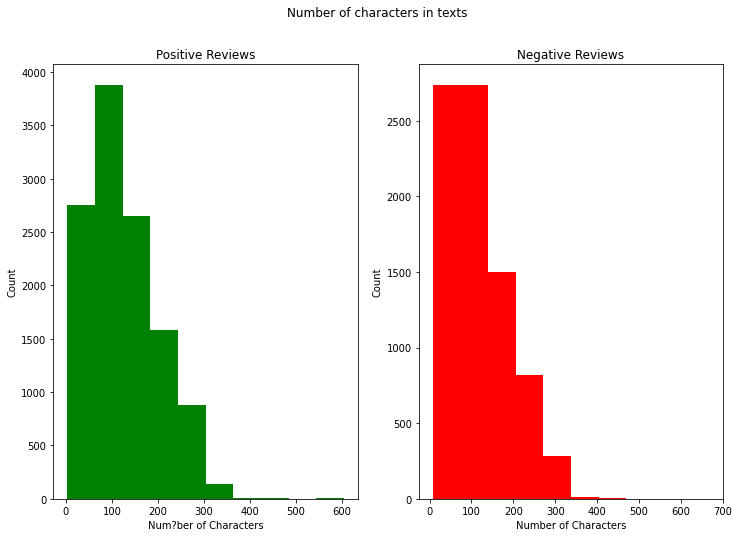

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Num?ber of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

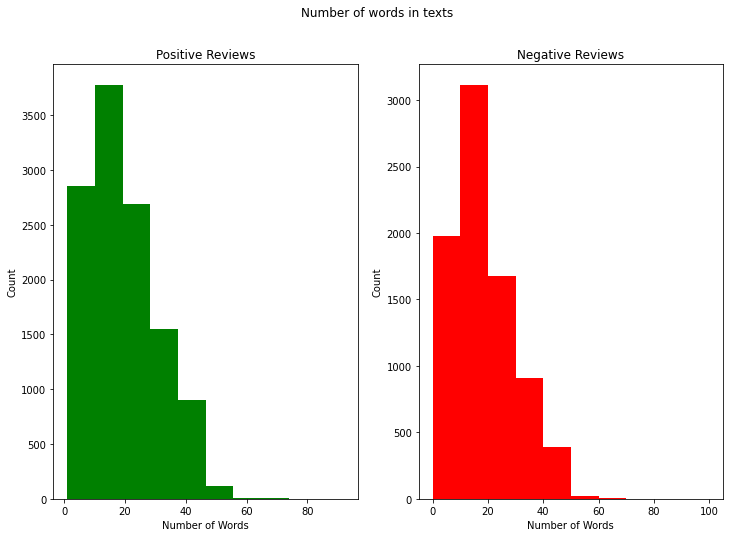

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

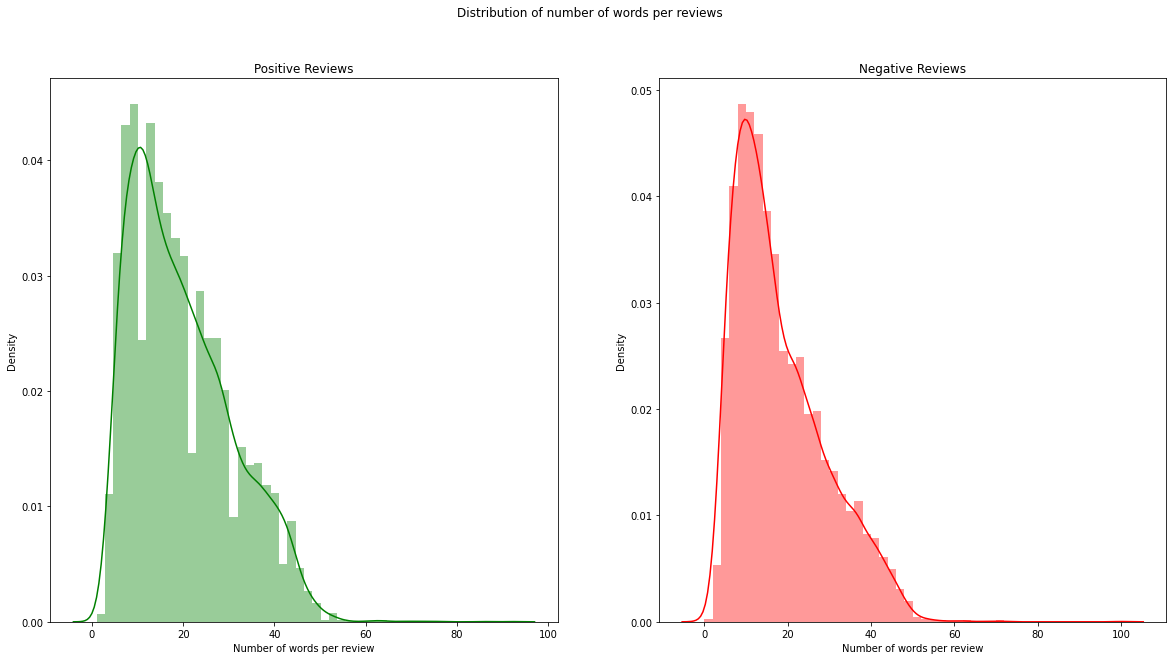

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

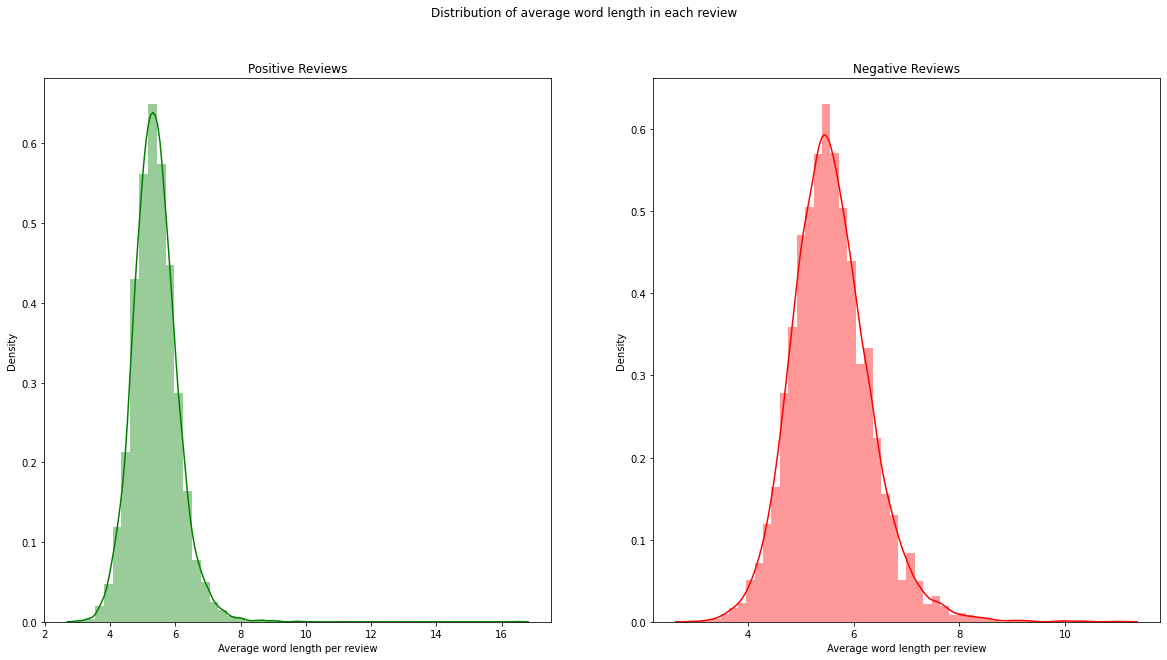

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

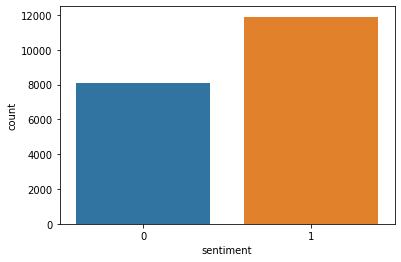

In [46]:
sns.countplot(x = 'sentiment', data = df)

In [47]:
df.columns

Index(['content', 'score', 'Clean_Text', 'polarity', 'subjectivity',
       'sentiment'],
      dtype='object')

In [48]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Clean_Text)
corpus[:5]

['snapscore', 'updating', 'properly', 'bug', 'found']

In [49]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,app,15834
1,snapchat,6130
2,like,4096
3,cant,3939
4,good,3765
5,fix,3481
6,friends,3329
7,update,3295
8,snap,3101
9,camera,2922


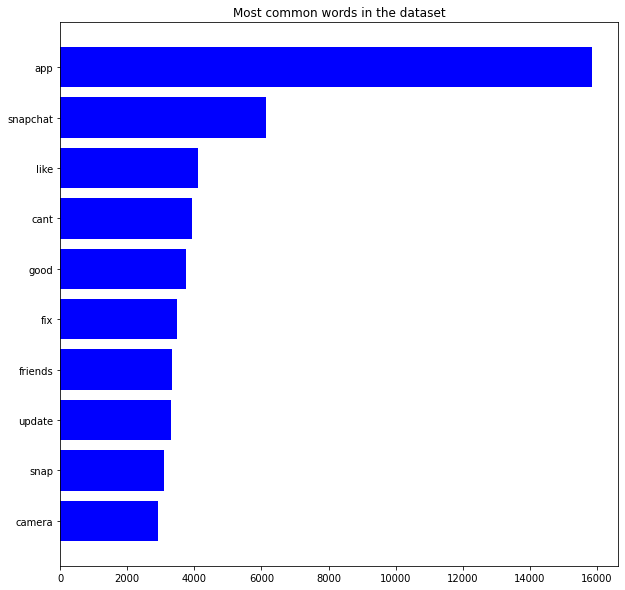

In [50]:
most_common = most_common.sort_values('countv')
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

In [51]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

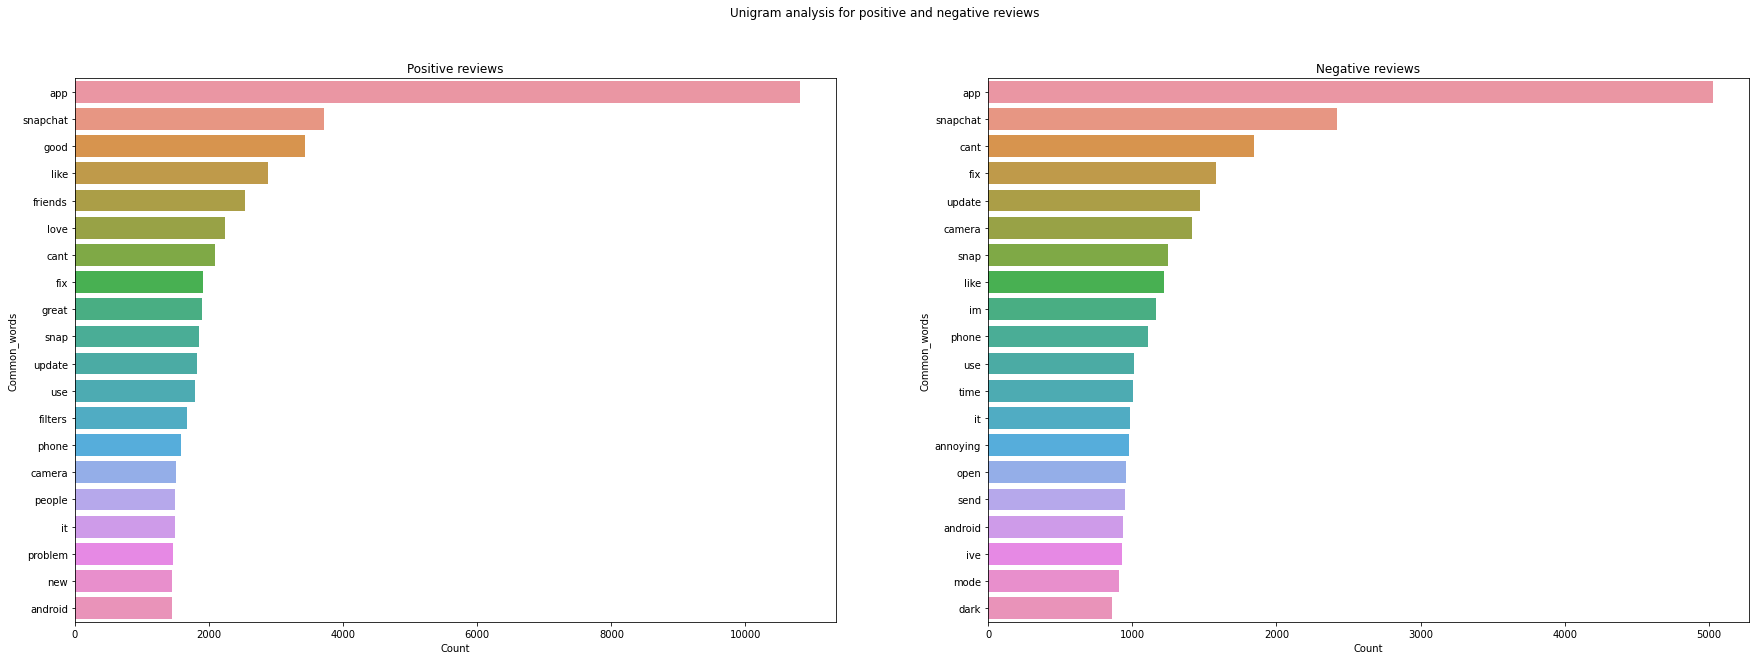

In [52]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30, 10))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

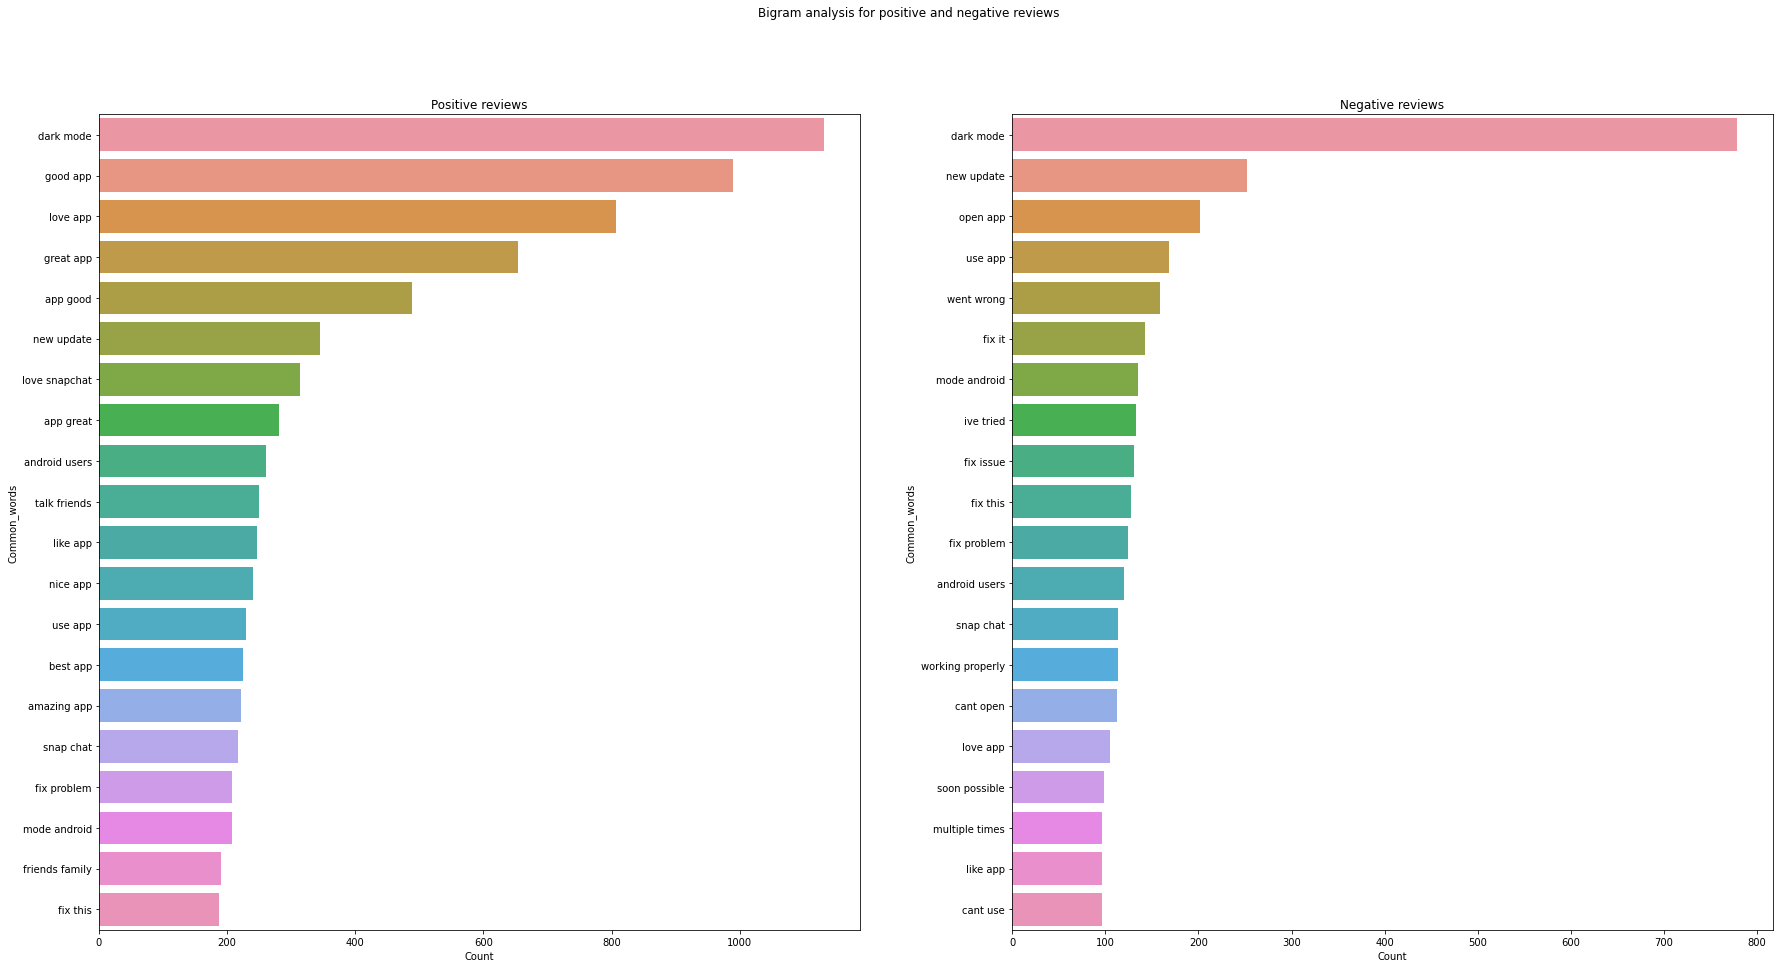

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

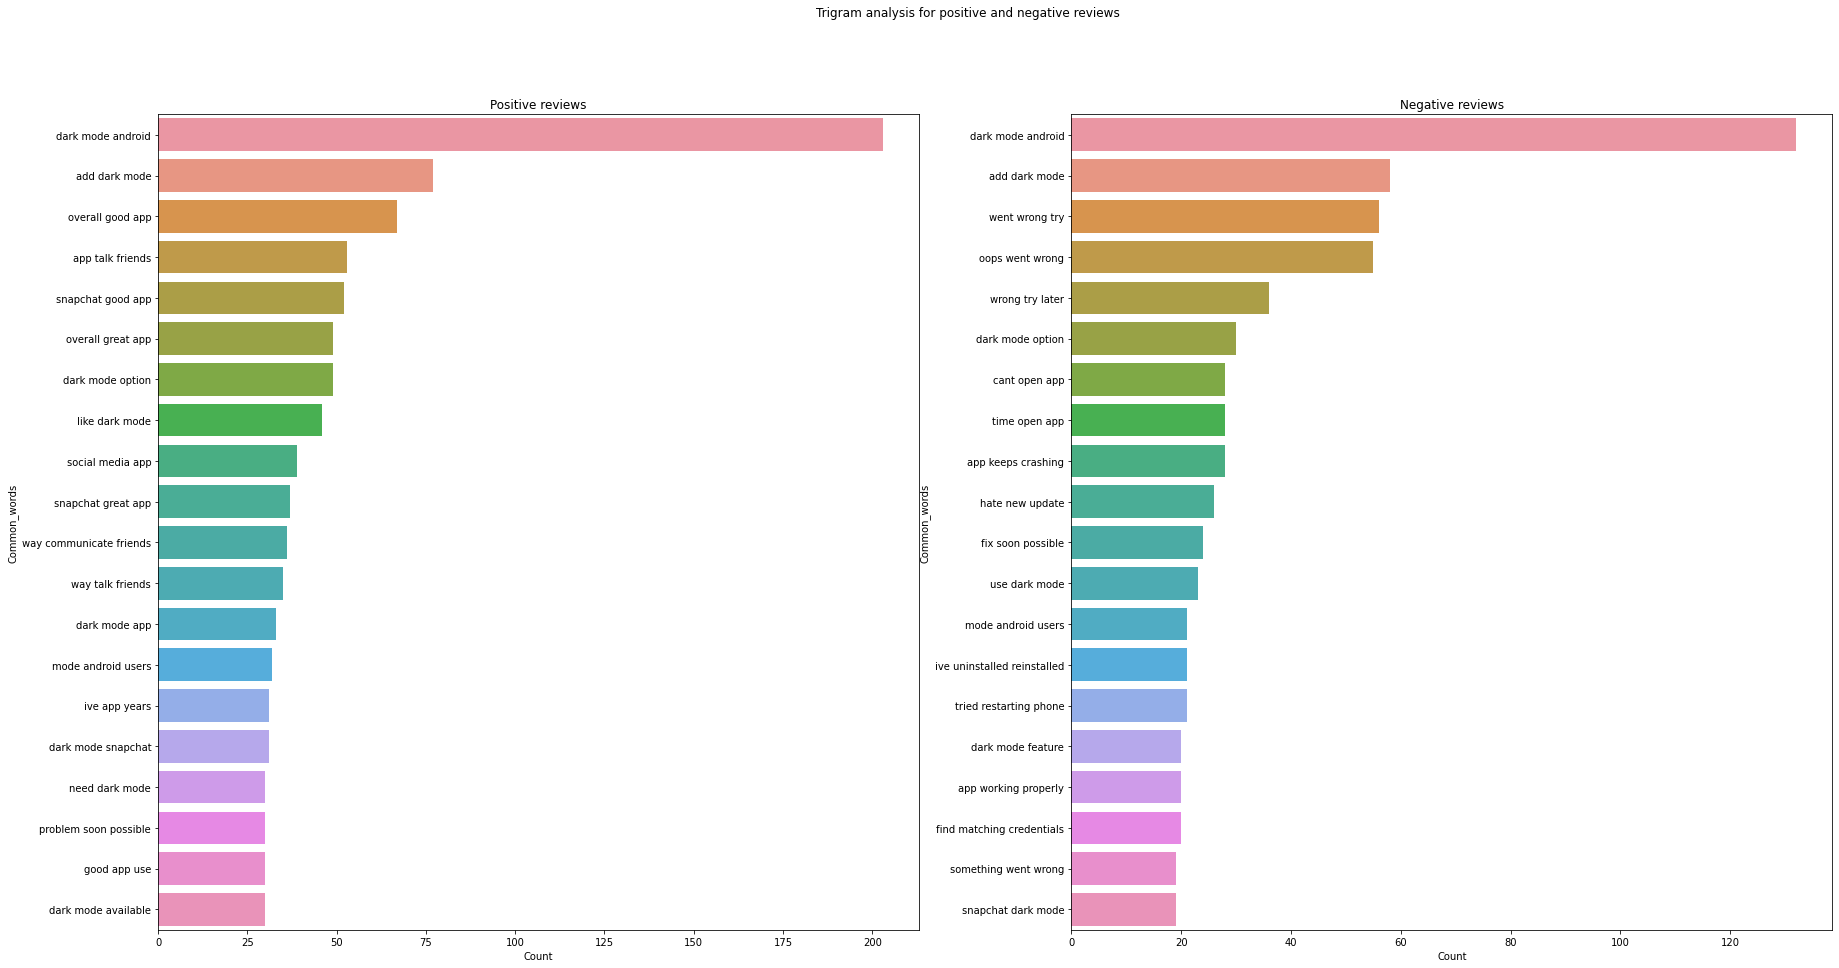

In [54]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [55]:
df.head()

,content,score,Clean_Text,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other b...,1,snapscore updating properly bug found,-0.062500,0.237500,0
1,not getting notifications even though notifica...,1,getting notifications notifications,0.000000,0.000000,0
2,it's super fun app...!!! can you please upload...,5,super fun app upload saree outfit snapchat,0.459635,0.433333,1
3,- not consumer friendly. ads and unskippable a...,1,consumer friendly ads unskippable ads stories...,0.065476,0.416667,1
4,i only want notifications for messages from fr...,1,want notifications messages friends giving ad ...,-0.050000,0.441667,0


In [56]:
df.rename(columns = {'Clean_Text':'review'}, inplace = True)

In [57]:
df.head()

,content,score,review,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other b...,1,snapscore updating properly bug found,-0.062500,0.237500,0
1,not getting notifications even though notifica...,1,getting notifications notifications,0.000000,0.000000,0
2,it's super fun app...!!! can you please upload...,5,super fun app upload saree outfit snapchat,0.459635,0.433333,1
3,- not consumer friendly. ads and unskippable a...,1,consumer friendly ads unskippable ads stories...,0.065476,0.416667,1
4,i only want notifications for messages from fr...,1,want notifications messages friends giving ad ...,-0.050000,0.441667,0


###splitting into train and test

In [58]:

train, test= train_test_split(df, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

In [59]:
train, test = train_test_split(df, test_size=0.2)

##model building

In [60]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: review
Shape of Train Data: 15996 rows
    Shape of Test Data: 3999 rows


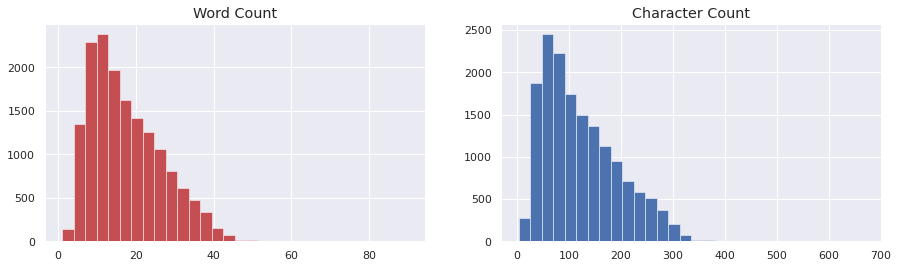

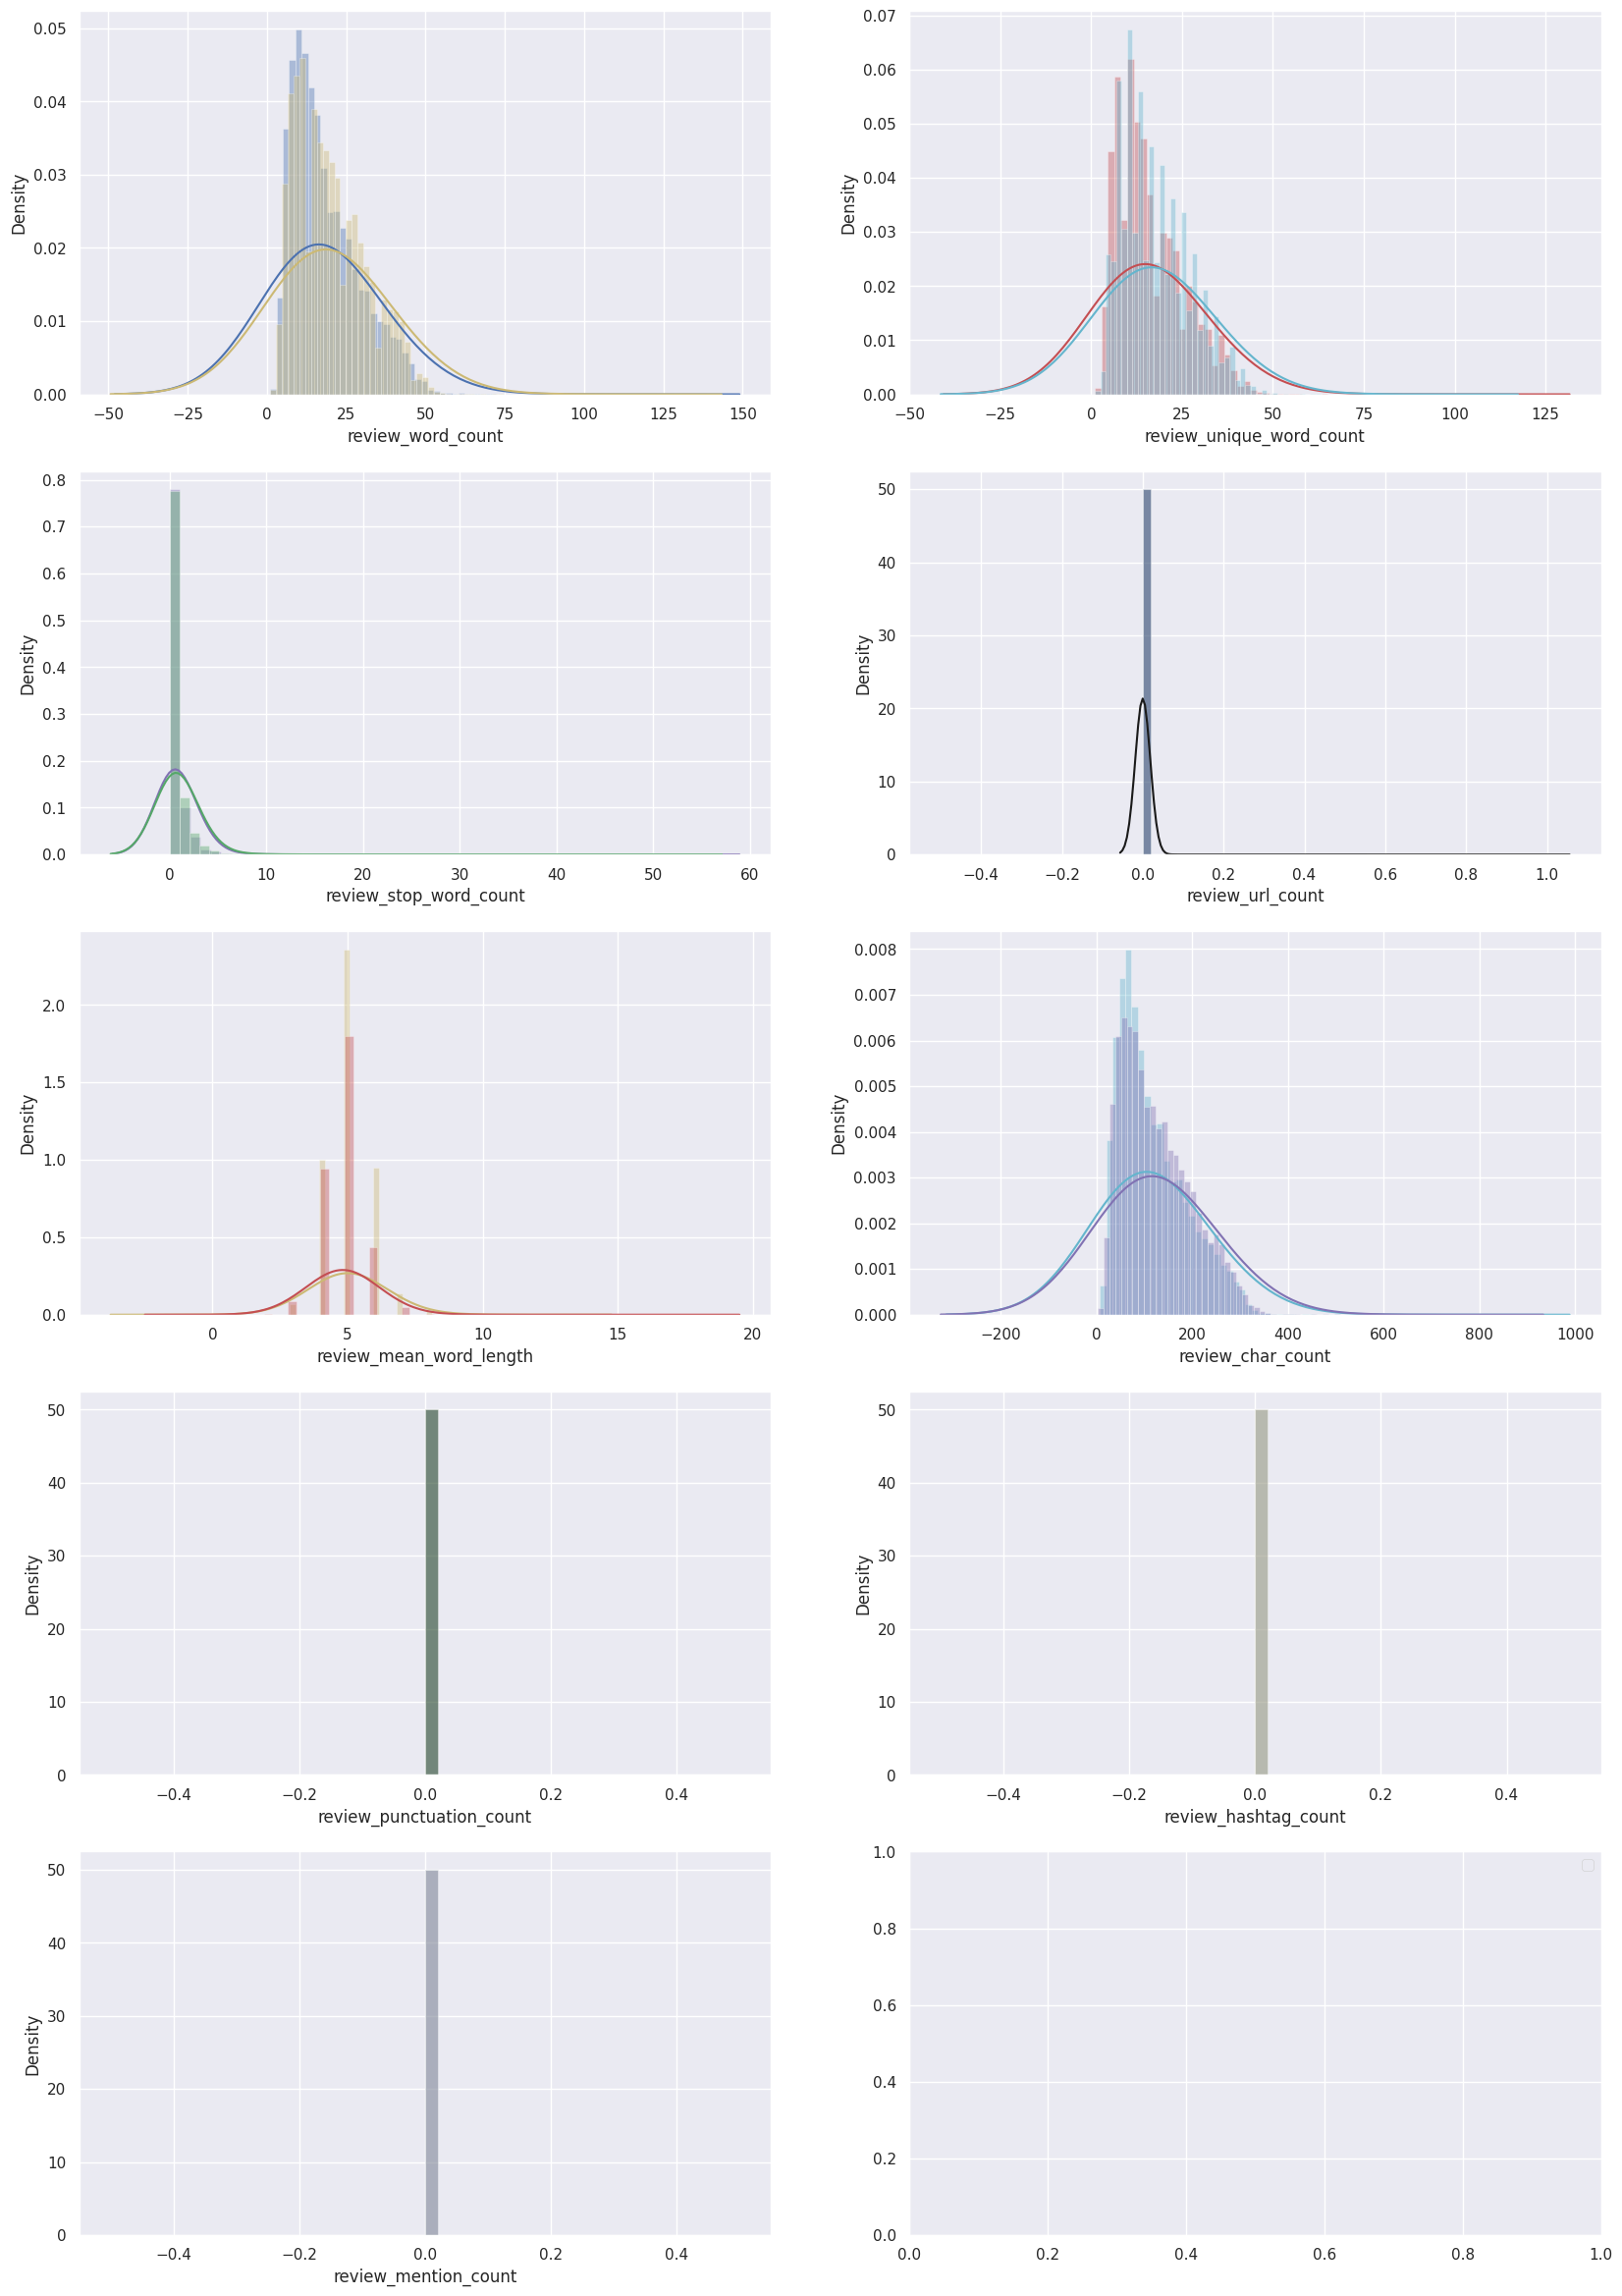

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for review column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 17 seconds

For target = sentiment

    For class = 0
Top 200 n-grams
: ['applic', 'work', 'snapchat', 'updat', 'fix', 'cant', 'snap', 'tri', 'open', 'camera', 'time', 'like', 'problem', 'annoy', 'video', 'log', 'use', 'send', 'phone', 'im', 'friend', 'issu', 'android', 'account', 'mode', 'messag', 'stori', 'chat', 'ive', 'dark', 'keep', 'bug', 'notif', 'stop', 'show', 'peopl', 'know', 'pictur', 'ad', 'let', 'filter', 'reinstal', 'new', 'uninstal', 'need', 'want', 'bad', 'delet', 'chang', 'day', 'option', 'wrong', 'load', 'thing', 'crash', 'add', 'featur', 'photo', 'soon', 'abl', 'happen', 'screen', 'login', 'second', 'recent', 'help', 'star', 'good', 'way', 'worst', 'save', 'lot', 'text', 'make', 'restart', 'face', 'hate', 'glit

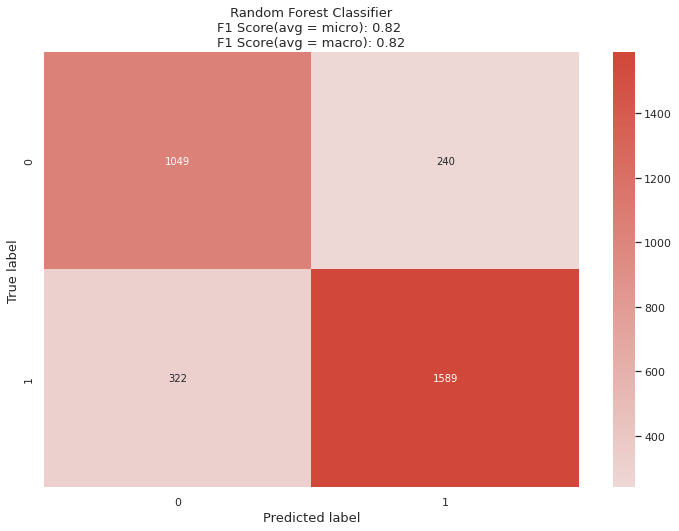

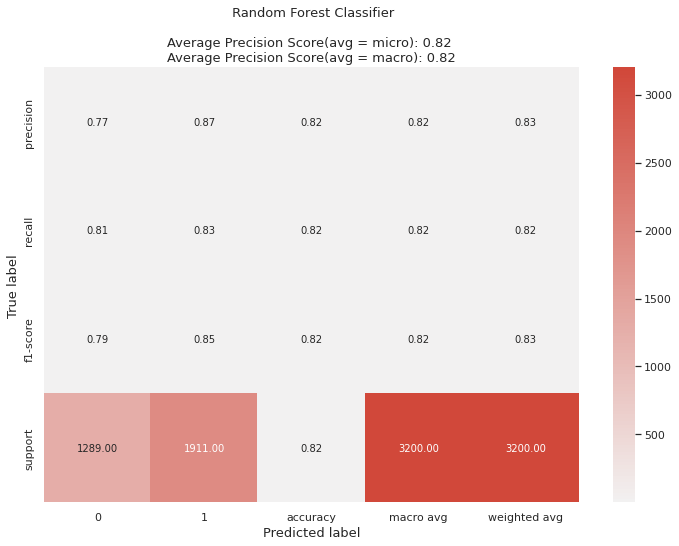

  Now transforming Train data to return as output...
  Transforming Test data to return as output...
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
Training completed. Time taken for Auto_NLP = 27.5 minutes


In [61]:
nlp_column = 'review'
target = 'sentiment'

train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(nlp_column, train, test, target, score_type='balanced_accuracy', modeltype='Classification', top_num_features=500, verbose = 2, build_model=True
)

In [62]:
nlp_transformer.predict(test_nlp[nlp_column])

array([1, 1, 1, ..., 0, 0, 1])

In [63]:
nlp_transformer.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function Auto_NLP.<locals>.<lambda> at 0x7febe8cd89e0>)),
                ('tfidfvectorizer',
                 TfidfVectorizer(encoding='latin-1', max_df=0.5522344268776632,
                                 max_features=3695, min_df=2,
                                 ngram_range=(1, 3), sublinear_tf=True,
                                 token_pattern='\\w{1,}')),
                ('selectkbest',
                 SelectKBest(k=3695,
                             score_func=<function chi2 at 0x7febf30db320>)),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=200,
                                                                              n_jobs=-1,
                                                                              random_state=99),
                                        cv

In [64]:
test_nlp['label'] = nlp_transformer.predict(test_nlp[nlp_column])

In [65]:
test_nlp

,content,score,review,polarity,subjectivity,sentiment,review_word_count,review_unique_word_count,review_stop_word_count,review_url_count,review_mean_word_length,review_char_count,review_punctuation_count,review_hashtag_count,review_mention_count,aap,abil,abil pin,abl,abl access,abl add,abl chang,abl log,abl login,abl open,abl pin,abl pin peopl,abl save,abl send,abl send snap,abl talk,abl use,abl view,absolut,absolut garbag,absolut love,absolut love applic,absolut terribl,absolut trash,acc,accept,access,access account,access camera,access contact,access snapchat,accessori,accid,accord,account,...,worri,worst,worst applic,worst applic ever,worst experi,worst thing,worth,would,wouldnt,wouldv,wow,write,written,wrong,wrong applic,wrong snapchat,wrong tri,wrong tri later,wrote,x,xl,ya,yall,yall fix,yall need,ye,yeah,year,year ago,year ive,year love,year now,year old,year recent,year work,yellow,yesterday,yet,young,younger,your,youtub,yr,z,z fold,zero,zero star,zoom,zoom camera,label
11014,"snapchat team this is for you- your discover stories are great, they have good content i find relevant but for the love of god please fix it. idk if its to get 3 times, 5 times the views per person on each individual story, but making stories keep going back to beginning right before an ad up to 5 times per discover story is asinine and annoying to the point people are going to stop giving those creators views making them less likely to upload on your platform. literally get a grip and fix it",3,snapchat team you discover stories great good content find relevant love god fix it idk 3 times 5 times views person individual story making stories going beginning right ad 5 times discover story asinine annoying point people going stop giving creators views making likely upload platform literally grip fix,0.17,0.58,1,49,39,2,0,5,308,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
16645,so changing the shape of my facial features is just the default on every filter now? so messed up and glad the younger generation don't seem to use the app anymore so it can't mess with their self esteem in the most formative years of their life. such a shame because some of the filters are so creative and fun otherwise....,1,changing shape facial features default filter now messed glad younger generation use app anymore cant mess self esteem formative years life shame filters creative fun otherwise,0.20,0.42,1,26,26,0,0,5,176,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
5969,"everything is cool, but please add dark theme for android",3,cool add dark theme android,0.10,0.53,1,5,5,0,0,4,27,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
12452,"overall good app for messaging friends, video calling, meeting new people and entertainment. however, the android app is absolutely horrendous, missing key features such as pinning people and dark mode

In [66]:
df

,content,score,review,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other bug found when using 👎,1,snapscore updating properly bug found,-0.06,0.24,0
1,not getting notifications even though notifications were on,1,getting notifications notifications,0.00,0.00,0
2,it's super fun app...!!! can you please upload saree outfit in the snapchat.,5,super fun app upload saree outfit snapchat,0.46,0.43,1
3,"- not consumer friendly. ads and unskippable ads in stories and discover. - toxic ""discover"" page full of clickbait. - pay to unlock features. - constantly wants you to add random ppl from all over the world. - wants you to add contacts from phone way too often. - can't customize which friends to see in list. only shows all friends alphabetically; chore to select recipients. - when you upload a story and change audience, it won't change the audience for that previously uploaded story snap.",1,consumer friendly ads unskippable ads stories discover toxic discover page clickbait pay unlock features constantly wants add random ppl world wants add contacts phone way often cant customize friends list shows friends alphabetically chore select recipients upload story change audience change audience previously uploaded story snap,0.07,0.42,1
4,i only want notifications for messages from friends. giving ad notifications under that same category ruins the app,1,want notifications messages friends giving ad notifications category ruins app,-0.05,0.44,0
...,...,...,...,...,...,...
19995,my camera hangs and glitches when ever i want to put some filter. i want to send feedback to snapchat so that they could fix but i can't even see that feedback option. lol. it was working okay before so it's just a technical issue .. email me! fix it please,2,camera hangs glitches want filter want send feedback snapchat fix cant feedback option lol working okay technical issue email me fix,0.43,0.43,1
19996,"just cause something can doesn't mean it will. apparently the developers dont know how to make it work on android cause i've got messages not sending, it says ive read messages i never opened so i start all over, the app itself stalls 3 minutes when i just try to discard a photo to take a better one. used to be my favorite way to communicate, now it's just getting to be trash.",2,cause mean will apparently developers dont know work android cause ive got messages sending says ive read messages opened start over app stalls 3 minutes try discard photo better one favorite way communicate getting trash,0.18,0.63,1
19997,"i got this app months ago and everything was great but for a couple months now it's been having so many glitches, my filters don't work properly, it lags out and doesn't always notify me when i have a message i've emailed the snapchat team about it and got a standard follow up email telling me someone from their team will be in touch but so far i have heard nothing back and even with the new updates the problems are still there.",3,got app months ago great couple months glitches filters work properly lags notify message ive emailed snapchat team got standard follow email telling team touch far heard new updates problems there,0.22,0.40,1
19998,"this is so s**t. does nothing but freeze when trying to take photos and when you use filters just glitches so you can't see what you're doing.... seriously?! i loved this app when it first came out but now clearly the developers don't care about making updates that actually work... next time - if it's not broken, don't ""fix"" it. please.",1,st freeze trying photos use filters glitches cant doing seriously loved app came clearly developers care making updates actually work time broken fix it please,0.21,0.34,1


In [67]:
#Vectorizing data

tfidf_vect = TfidfVectorizer() #tfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain)
Xtest_tfidf = tfidf_vect.transform(Xtest)
count_vect = CountVectorizer() # CountVectorizer
Xtrain_count = count_vect.fit_transform(Xtrain)
Xtest_count = count_vect.transform(Xtest)

Logistic Regression Accuracy : 84.55%
[[1285  334]
 [ 284 2096]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1619
           1       0.86      0.88      0.87      2380

    accuracy                           0.85      3999
   macro avg       0.84      0.84      0.84      3999
weighted avg       0.84      0.85      0.85      3999



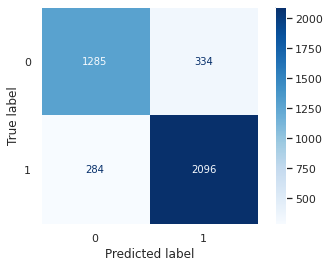

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
lr = LogisticRegression()
lr.fit(Xtrain_tfidf,ytrain)
p1=lr.predict(Xtest_tfidf)
s1=accuracy_score(ytest,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(confusion_matrix(ytest, p1))
print(metrics.classification_report(ytest, p1))

Linear Support Vector Classifier Accuracy : 85.15%
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1619
           1       0.88      0.87      0.87      2380

    accuracy                           0.85      3999
   macro avg       0.85      0.85      0.85      3999
weighted avg       0.85      0.85      0.85      3999



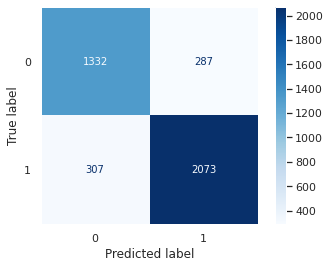

In [69]:
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(Xtrain_tfidf,ytrain)
p3=linear_svc.predict(Xtest_tfidf)
s3=accuracy_score(ytest,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(linear_svc, Xtest_tfidf, ytest,cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p3))

XGBoost Accuracy : 85.02%
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1619
           1       0.90      0.85      0.87      2380

    accuracy                           0.85      3999
   macro avg       0.84      0.85      0.85      3999
weighted avg       0.85      0.85      0.85      3999



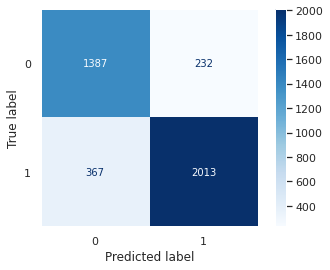

In [70]:
xgbo = XGBClassifier()
xgbo.fit(Xtrain_tfidf,ytrain)
p4=xgbo.predict(Xtest_tfidf)
s4=accuracy_score(ytest,p4)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p4))

Random Forest Accuracy : 85.02%
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1619
           1       0.84      0.88      0.86      2380

    accuracy                           0.83      3999
   macro avg       0.82      0.82      0.82      3999
weighted avg       0.83      0.83      0.83      3999



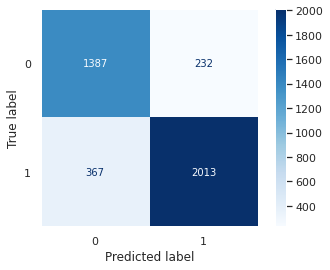

In [71]:
rf = RandomForestClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p5=rf.predict(Xtest_tfidf)
s5=accuracy_score(ytest,p4)
print("Random Forest Accuracy :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p5))

Decision Tree Accuracy : 85.02%
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1619
           1       0.81      0.81      0.81      2380

    accuracy                           0.78      3999
   macro avg       0.77      0.77      0.77      3999
weighted avg       0.78      0.78      0.78      3999



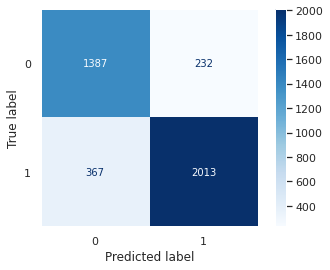

In [72]:
rf = DecisionTreeClassifier()
rf.fit(Xtrain_tfidf,ytrain)
p6=rf.predict(Xtest_tfidf)
s6=accuracy_score(ytest,p4)
print("Decision Tree Accuracy :", "{:.2f}%".format(100*s6))
plot_confusion_matrix(xgbo, Xtest_tfidf, ytest, cmap = 'Blues')
plt.grid(False)
print(metrics.classification_report(ytest, p6))

In [73]:
df

,content,score,review,polarity,subjectivity,sentiment
0,snapscore is not updating properly and other bug found when using 👎,1,snapscore updating properly bug found,-0.06,0.24,0
1,not getting notifications even though notifications were on,1,getting notifications notifications,0.00,0.00,0
2,it's super fun app...!!! can you please upload saree outfit in the snapchat.,5,super fun app upload saree outfit snapchat,0.46,0.43,1
3,"- not consumer friendly. ads and unskippable ads in stories and discover. - toxic ""discover"" page full of clickbait. - pay to unlock features. - constantly wants you to add random ppl from all over the world. - wants you to add contacts from phone way too often. - can't customize which friends to see in list. only shows all friends alphabetically; chore to select recipients. - when you upload a story and change audience, it won't change the audience for that previously uploaded story snap.",1,consumer friendly ads unskippable ads stories discover toxic discover page clickbait pay unlock features constantly wants add random ppl world wants add contacts phone way often cant customize friends list shows friends alphabetically chore select recipients upload story change audience change audience previously uploaded story snap,0.07,0.42,1
4,i only want notifications for messages from friends. giving ad notifications under that same category ruins the app,1,want notifications messages friends giving ad notifications category ruins app,-0.05,0.44,0
...,...,...,...,...,...,...
19995,my camera hangs and glitches when ever i want to put some filter. i want to send feedback to snapchat so that they could fix but i can't even see that feedback option. lol. it was working okay before so it's just a technical issue .. email me! fix it please,2,camera hangs glitches want filter want send feedback snapchat fix cant feedback option lol working okay technical issue email me fix,0.43,0.43,1
19996,"just cause something can doesn't mean it will. apparently the developers dont know how to make it work on android cause i've got messages not sending, it says ive read messages i never opened so i start all over, the app itself stalls 3 minutes when i just try to discard a photo to take a better one. used to be my favorite way to communicate, now it's just getting to be trash.",2,cause mean will apparently developers dont know work android cause ive got messages sending says ive read messages opened start over app stalls 3 minutes try discard photo better one favorite way communicate getting trash,0.18,0.63,1
19997,"i got this app months ago and everything was great but for a couple months now it's been having so many glitches, my filters don't work properly, it lags out and doesn't always notify me when i have a message i've emailed the snapchat team about it and got a standard follow up email telling me someone from their team will be in touch but so far i have heard nothing back and even with the new updates the problems are still there.",3,got app months ago great couple months glitches filters work properly lags notify message ive emailed snapchat team got standard follow email telling team touch far heard new updates problems there,0.22,0.40,1
19998,"this is so s**t. does nothing but freeze when trying to take photos and when you use filters just glitches so you can't see what you're doing.... seriously?! i loved this app when it first came out but now clearly the developers don't care about making updates that actually work... next time - if it's not broken, don't ""fix"" it. please.",1,st freeze trying photos use filters glitches cant doing seriously loved app came clearly developers care making updates actually work time broken fix it please,0.21,0.34,1


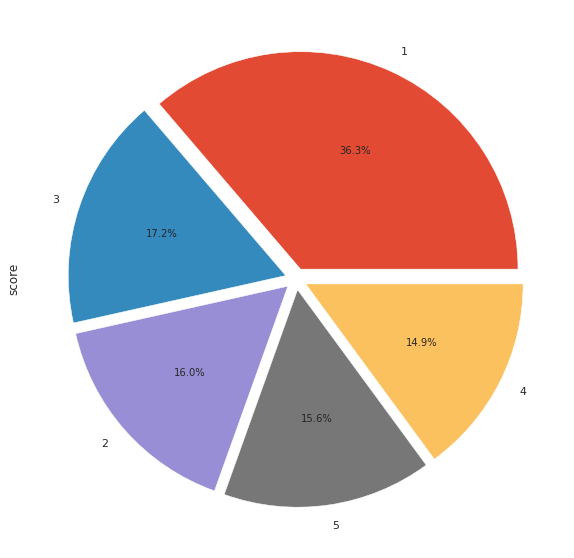

In [74]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
df['score'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode)

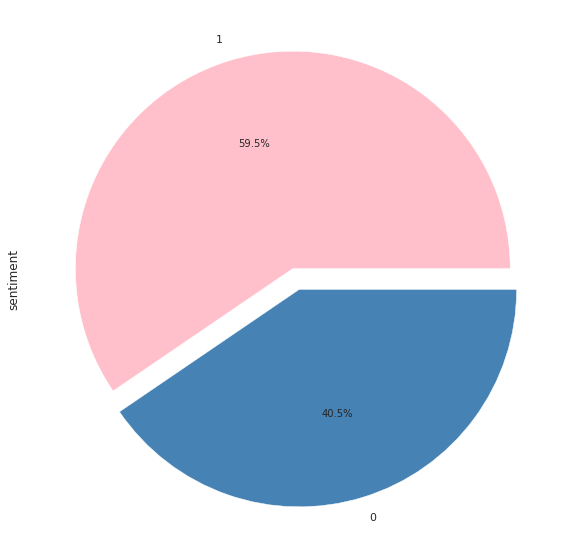

In [75]:
explode = (0.05, 0.05)
colors = ['pink', 'steelblue']
df['sentiment'].value_counts().plot(kind = 'pie', figsize = (10,10), autopct ='%1.1f%%', explode=explode, colors=colors)